In [11]:
# !pip install nba_api
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [18]:
def one_dict(list_dict):
    keys = list_dict[0].keys() # got all keys from dict nested in list
    out_dict = {key:[] for key in keys} # make a single dict with keys and in value added a empty list
    for dict_ in list_dict:
        for key,value in dict_.items():
            out_dict[key].append(value) # appending values corresponding to keys in list
    return out_dict

dict_nba_team = one_dict(nba_teams) 
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Atlanta          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966

In [22]:
df_warriors = df_teams[df_teams["nickname"]=="Warriors"]
df_warriors

id              full_name abbreviation  nickname          city  \
7  1610612744  Golden State Warriors          GSW  Warriors  Golden State   

        state  year_founded  
7  California          1946

In [25]:
id_warriors = df_warriors[["id"]].values[0]
id_warriors

array([1610612744], dtype=int64)

In [26]:
id_warriors = df_warriors[["id"]].values[0][0]
id_warriors

1610612744

In [31]:
# ReST API uses internet to communicate between softwares
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
games = gamefinder.get_data_frames()[0]
games.head(7)

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME     GAME_ID  \
0     22020  1610612744               GSW  Golden State Warriors  0022000443   
1     22020  1610612744               GSW  Golden State Warriors  0022000424   
2     22020  1610612744               GSW  Golden State Warriors  0022000409   
3     22020  1610612744               GSW  Golden State Warriors  0022000393   
4     22020  1610612744               GSW  Golden State Warriors  0022000378   
5     22020  1610612744               GSW  Golden State Warriors  0022000371   
6     22020  1610612744               GSW  Golden State Warriors  0022000360   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB   REB  AST  \
0  2021-02-17  GSW vs. MIA  W  265  120  ...   0.762   9.0  36.0  45.0   32   
1  2021-02-15  GSW vs. CLE  W  240  129  ...   0.952   5.0  34.0  39.0   34   
2  2021-02-13  GSW vs. BKN  L  240  117  ...   0.800   5.0  32.0  37.0   25   
3  2021-02-11  GSW vs. ORL  W  239  111  ...   0.750   9.0  37.0  46.0   29   
4  2021-02-09    GSW @ SAS  W  240  114  ...   0.684  10.0  40.0  50.0   26   
5  2021-02-08    GSW @ SAS  L  241  100  ...   0.733   6.0  43.0  49.0   29   
6  2021-02-06    GSW @ DAL  L  241  132  ...   0.870   6.0  34.0  40.0   27   

   STL  BLK  TOV  PF  PLUS_MINUS  
0   10    1   15  19         8.0  
1    9   10   14  23        31.0  
2    6    6   13  15       -17.0  
3    6    6   17  20         6.0  
4    8    4   10  19        23.0  
5    4    6   20  19        -5.0  
6   11    4   16  24        -2.0  

[7 rows x 28 columns]

In [41]:
games_home = games[games["MATCHUP"]=="GSW vs. CLE"]
games_away = games[games["MATCHUP"]=="GSW @ CLE"]

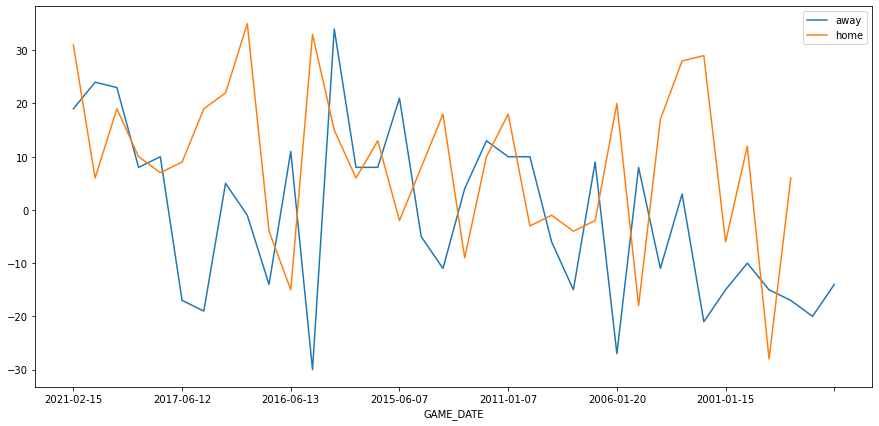

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = plt.subplot()
games_away.plot(x="GAME_DATE", y="PLUS_MINUS", ax=ax)
games_home.plot(x="GAME_DATE", y="PLUS_MINUS", ax=ax)
ax.legend(["away","home"])
plt.show()